## Question 1: Given some sample data, write a program to answer the following: 

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.



In [1]:
# Import all required libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

In [3]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [4]:
df.info()
#no null values in the dataset, 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [5]:
duplicate = df[df.duplicated()]
duplicate
#There is no duplicae value in data, so our data is clean

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at


In [6]:
df.describe()
#as we can see from below details, in order amount Min is 90 and max is 704000, and total items min is 1 and max is 2000, 
#seems like there are outliers in data as 25% 50% and 75% are way lower than max


,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [7]:
# lets deep dive into dataset and start analysing order amount

# calculate the average order value

print('Average Order Value:', df['order_amount'].mean(), ',',
      'Median Order Value:', df['order_amount'].median())

Average Order Value: 3145.128 , Median Order Value: 284.0


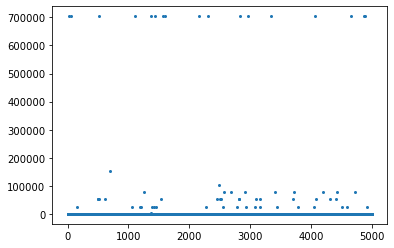

In [8]:
 #As the average  and median have a diffrence, check outliers in data
    
plt.scatter(x=df['order_id'], y=df['order_amount'], s=4)
plt.show()

# As we can see from below image, most of the order amount are at bottom but few are way higher than the range

As we can see the data have outliers, we have to go deep in to outliers to get clear picture of data

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,order_amount
90,18
94,25
101,15
111,16
112,48
...,...
51450,16
77175,9
102900,1
154350,1


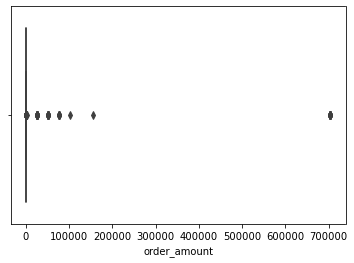

In [9]:
sns.boxplot(df['order_amount'])
pd.DataFrame(df['order_amount'].value_counts().sort_index())

In [10]:
#We can see that order amount have outlier for price more than 700k lets figure out why it is so high

df_group_user = pd.DataFrame({'mean_amount': df.groupby('user_id')['order_amount'].mean()}).reset_index()
df_group_user

,user_id,mean_amount
0,607,704000.000000
1,700,299.375000
2,701,397.076923
3,702,406.615385
4,703,380.687500
...,...,...
296,995,354.400000
297,996,252.952381
298,997,2248.923077
299,998,291.111111


In [12]:
# Check max order amout for each group
df.groupby('total_items').agg(max_order_amt = ('order_amount', max))
# Item 1, 2, 3, 4, 6 and 8 are higher

,max_order_amt
total_items,
1,25725
2,51450
3,77175
4,102900
5,1760
6,154350
8,1064
2000,704000


In [13]:
#User id 607 have average price of 704000

df[df['user_id']==607]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


In [14]:
#shop id 78 have amount in multiplication of 25725, so for each item it costs 25725 which is not something usual price for shoes
df[df['shop_id']==78]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57
490,491,78,936,51450,2,debit,2017-03-26 17:08:19
493,494,78,983,51450,2,cash,2017-03-16 21:39:35
511,512,78,967,51450,2,cash,2017-03-09 7:23:14
617,618,78,760,51450,2,cash,2017-03-18 11:18:42
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20


In [15]:
pd.DataFrame(df['total_items'].value_counts().sort_index())

,total_items
1,1830
2,1832
3,941
4,293
5,77
6,9
8,1
2000,17


As we can observe that the total items jump from 8 to 2000, which is outlier, lets remove the outliers from above obersvation, user_id = 607 and total_items 2000 and for all items purchased at exactly same time at 4 am which indicated that this dataset was manupulated or possible fraud

In [16]:
#lets remove the outlier from data
new_data = df[df['user_id'] != 607]

In [17]:
new_data2 = new_data[new_data['shop_id'] != 78]

In [18]:
new_data2.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,2499.551347,49.846465,849.752279,302.580514,1.994734
std,1444.069407,29.061131,86.840313,160.804912,0.982821
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1248.000000,24.000000,775.000000,163.000000,1.000000
50%,2497.000000,50.000000,850.000000,284.000000,2.000000
75%,3751.000000,74.000000,925.000000,387.000000,3.000000
max,5000.000000,100.000000,999.000000,1760.000000,8.000000


In [19]:
new_data2['order_amount'].mean(), new_data2['order_amount'].median()

(302.58051448247926, 284.0)

### a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

In this dataset couple of outliers are affecting the AOV, As per analysis we found below calculations gone wrong, 

    A. 17 transactions of 2000 from user id 607 for total amount of 704000 at excatly the same time at 4am
    B. For shop id 78 transactions are in multiplication of 25725

### b. What metric would you report for this dataset?

Based on the analysis median will be a better measure “average”(AOV) than the mean. Unlike mean, median is an evaluation metric which is not affected by the extreme data points

### c. What is its value?

The median is 284,

##  Question 2 For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

#### a. How many orders were shipped by Speedy Express in total?

#### Ans: 54

SELECT Count(OrderID) FROM

Orders o Inner Join Shippers s

ON o.ShipperID = s.ShipperID

Where ShipperName = 'Speedy Express'

#### b. What is the last name of the employee with the most orders?

#### Ans: 54 Ans: 54Ans: LastName = Peacock, MAX(NetOrders) = 40

SELECT LastName, MAX(NetOrders) FROM

(Select *, COUNT(DISTINCT OrderID) as NetOrders FROM

(SELECT o.OrderID, e.EmployeeID, e.LastName, e.FirstName

FROM Orders o Inner Join Employees e

ON o.EmployeeID = e.EmployeeID)

GROUP BY EmployeeID

ORDER BY COUNT(DISTINCT OrderID) DESC)

#### c. What product was ordered the most by customers in Germany?

#### Ans: 54 Ans : Gorgonzola Telino

SELECT Products.ProductName FROM OrderDetails

LEFT JOIN Orders ON Orders.OrderID = OrderDetails.OrderID

LEFT JOIN Products ON Products.ProductID = OrderDetails.ProductID

LEFT JOIN Customers ON Customers.CustomerID = Orders.CustomerID

WHERE Customers.Country = "Germany"

GROUP BY OrderDetails.ProductID

ORDER BY COUNT(*) DESC

LIMIT 1;